## **Explanatory Notebook**

##### By Daxton Furniss and Chase Maughan COMP 5960

# **Utah Fishing: A Data-Driven Guide to Utah's Top Fishing Spots**

## **Introduction**

#### Fishing is a popular and long-standing pastime for outdoor recreation, and Utah is a locale famous for the accessibility to rivers, lakes and streams, as well as the variety of fish that populate them. Especially in recent years, many more people have begun fishing and enjoying the sport across the state. Because of this, the Utah Division of Wildlife Resources (DWR) helps to stock local bodies of water to keep Utah fish populations thriving so that people may fish for food, sport, and recreation. With our mutual background and interest in fishing, we hope to analyze distribution and fishing stocking populations to evaluate sustainability trends, stocking trends for fish population and species, and best destinations to go fishing for either your favorite fish, or where there is just a lot of fish to be caught. We hope to be able to leverage this data in order to create a tool to allow fisherman to find where their favorite fish are located and can, historically, go to catch them. 

In [10]:
#Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
#Import data from compiled .csv file 

fish_stock_data = pd.read_csv('Stocking_All_Years.csv')
fish_stock_data.rename(columns={'Spieces':'Species', 'Quanty':'Quantity'}, inplace=True) #Renaming misspelled column names 
fish_stock_data
#Combining data where only 'Quantity' value is different, to compile stock instances on same day

fish_stock_data = fish_stock_data.groupby(['Water Name', 'County', 'Species', 'Average Length', 'Date Stocked']).agg({"Quantity": 'sum'}).reset_index()
fish_stock_data
# Iterate through values in 'Water Name' and add corresponding water body type in new column

river_values = [' R']
pond_values = [' POND', ' P ', 'PARK', 'WPA', ' PND', ' PONDS', ' PD', ' Pond']
creek_values = [' CR', ' CREEK']
res_values = ['RES', 'Res', 'RESERVOIR', 'Reservoir']
lake_values = [' L', ' LAKES', ' LAKE', ' Lake']
fishery_values = [' FISHERY', ' Fishery', 'BLUE RIBBON']

for i, row in fish_stock_data.iterrows():
    water_name = row['Water Name']
    if any(value in water_name for value in fishery_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Fishery'
    elif any(value in water_name for value in res_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Reservoir'
    elif any(value in water_name for value in lake_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Lake'
    elif any(value in water_name for value in pond_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Pond'
    elif any(value in water_name for value in river_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'River'
    elif any(value in water_name for value in creek_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Creek'
    else:
        fish_stock_data.at[i, 'Water Body Type'] = 'Other'

fish_stock_data['Date Stocked'] = pd.to_datetime(fish_stock_data['Date Stocked'])

fish_stock_data['Year'] = fish_stock_data['Date Stocked'].dt.year.astype('Int64')
fish_stock_data['Month'] = fish_stock_data['Date Stocked'].dt.month.astype('Int64')
fish_stock_data['Day'] = fish_stock_data['Date Stocked'].dt.day.astype('Int64')

In [ ]:
#Adjusting altair default of 5000 rows maximum, to allow for greater number of rows in our dataset

alt.data_transformers.enable('default', max_rows=60000)

In [3]:
# Number of unique water name locations
num_water_names = fish_stock_data['Water Name'].nunique()

# Number of unique species
num_species = fish_stock_data['Species'].nunique()

# Number of unique water body types
num_water_body_types = fish_stock_data['Water Body Type'].nunique()

# Average number of fish stocked per year
avg_fish_stocked_per_year = fish_stock_data.groupby('Year')['Quantity'].sum().mean()

# Creating a table to be used in explanatory notebook
summary_table = pd.DataFrame({
    'Utah Water, Fish, and Stocking Information': ['Number of Water Name Locations', 'Number of Species', 'Number of Water Body Types', 'Average Number of Fish Stocked per Year'],
    'Count': [num_water_names, num_species, num_water_body_types, avg_fish_stocked_per_year]
})

# Changing Value f
summary_table['Count'] = summary_table['Count'].apply(lambda x: f'{x:,.0f}')
summary_table.style.hide(axis="index")

"Utah Water, Fish, and Stocking Information",Count
Number of Water Name Locations,"1,257"
Number of Species,33
Number of Water Body Types,7
Average Number of Fish Stocked per Year,"9,684,444"


#### Here we see that there are plenty of unique locations in Utah that are stocked with fish, and each contain a variety of different fish species to catch! Not only this, but on average, Utah is stocking almost 10 million fish per year in the State's waters. This is distributed across all areas of the state, and hatcheries provide more than 30 different species of fish to populate state waters for fishermen to catch. For each of Utah's small to large bodies of waters and unique locations, we tried to analyze the most popular locations that local and visiting anglers would visit in order to catch the species of fish they want, and their limit. 

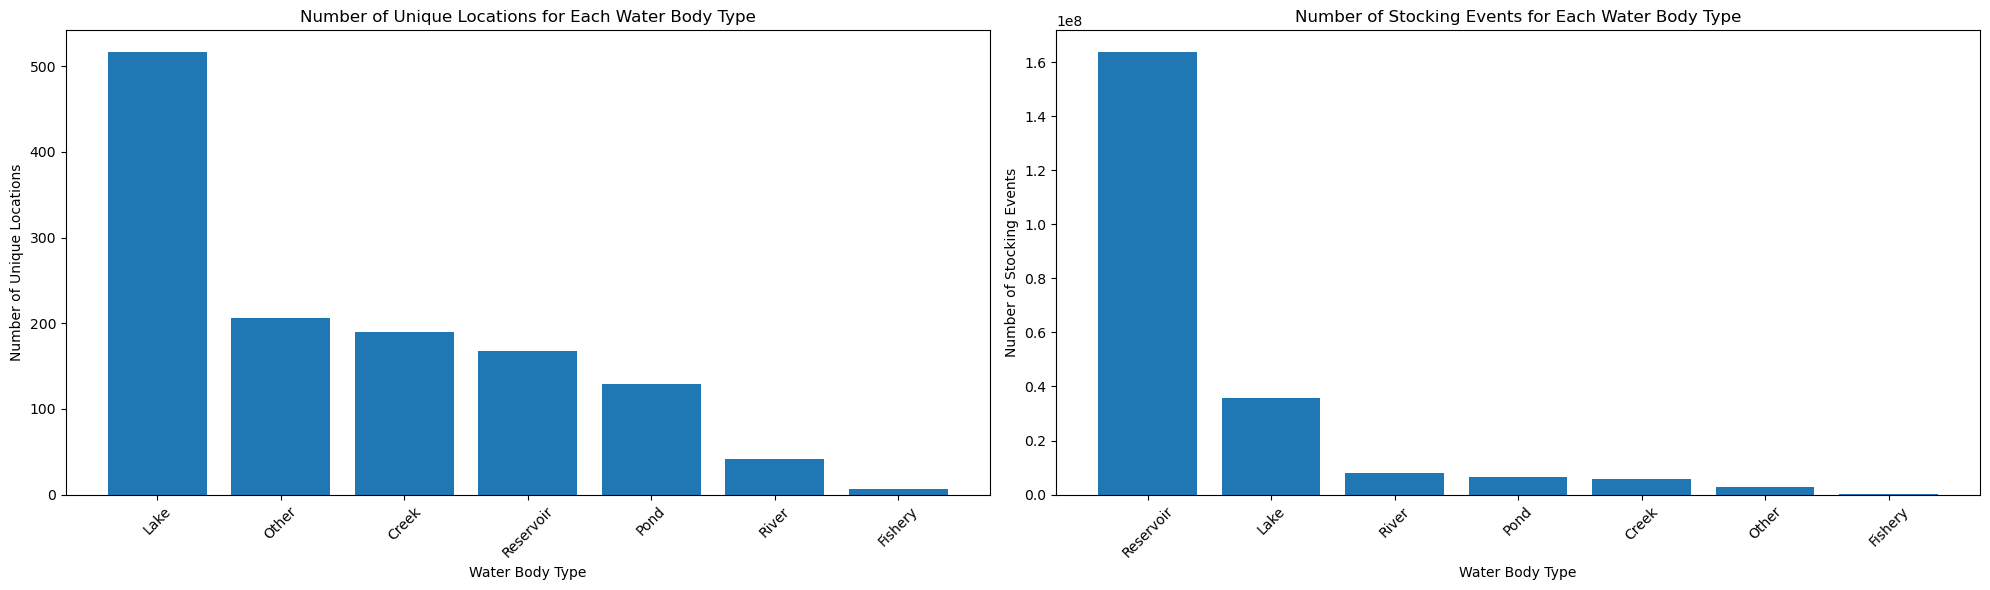

In [4]:
# Number of unique locations for each Water Body Type 
unique_instances_by_water_body_type = fish_stock_data.groupby('Water Body Type')['Water Name'].nunique().reset_index(name='Unique Instances')
unique_instances_by_water_body_type = unique_instances_by_water_body_type.sort_values(by='Unique Instances', ascending=False)

# Caveat is some may not be able to be classified fully correctly using character recognition, so sorted into 'Other' Category

# Total counts of instances each Water Body Type was stocked
top_water_body_types = fish_stock_data.groupby('Water Body Type')['Quantity'].sum().nlargest(7).reset_index(name='Top Water Body Types')

# Plotting the number of unique locations for each Water Body Type and the number of stocking events for each Water Body Type
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the number of unique locations for each Water Body Type
axes[0].bar(unique_instances_by_water_body_type['Water Body Type'], unique_instances_by_water_body_type['Unique Instances'])
axes[0].set_title('Number of Unique Locations for Each Water Body Type')
axes[0].set_xlabel('Water Body Type')
axes[0].set_ylabel('Number of Unique Locations')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the number of stocking events for each Water Body Type
axes[1].bar(top_water_body_types['Water Body Type'], top_water_body_types['Top Water Body Types'])
axes[1].set_title('Number of Stocking Events for Each Water Body Type')
axes[1].set_xlabel('Water Body Type')
axes[1].set_ylabel('Number of Stocking Events')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### The type of water and location you are fishing at influences many key factors for a fisherman. Whether it is from what type of rod you need, bait, fishing gear, or even ease on how to get there, we wanted to find out. We want to identify where fish are being stocked, in order to inform fisherman how to prepare for their day of fishing to increase their chances of bringing home some fish. Due to Utah being home to multiple mountain ranges like the Wasatch and the Uintas, there are countless small alpine lakes that appear across the state. We see hundreds of lakes being stocked every year in order to keep these local populations thriving. However, this doesn't necessarily correlate to huge amounts of fish being stocked per lake. That's why we identified reservoirs as the highest receivers of stocked fish. Reservoirs have been stocked thousands of times over the past 20 years, and are often locations that need many more fish to stock an area of their size. So whether you are hoping to get on a boat and go fish Flaming Gorge Reservoir, or try your luck at a small Uinta Lake, we hope to prepare local and visiting fisherman alike. 

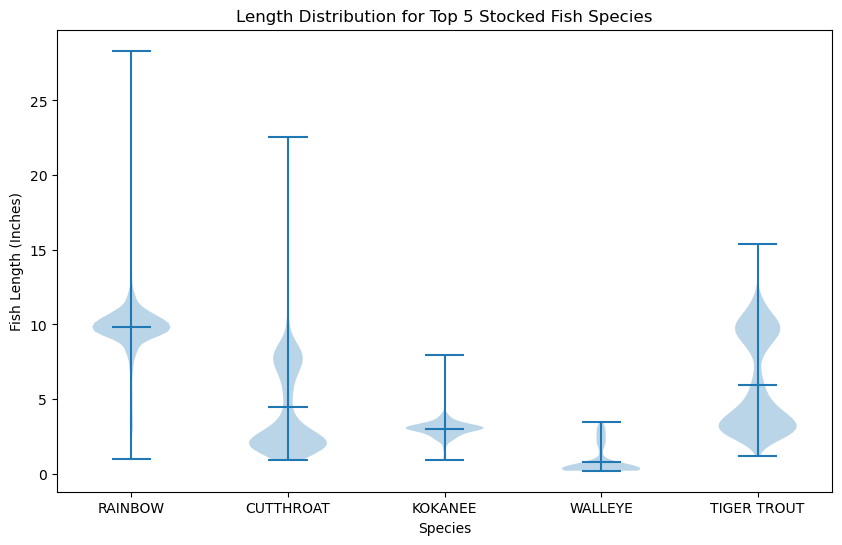

In [14]:
#Selecting only top 5 fish that were stocked the most
species_filter = ['RAINBOW', 'CUTTHROAT', 'KOKANEE', 'WALLEYE', 'TIGER TROUT']
filtered_data = fish_stock_data[fish_stock_data['Species'].isin(species_filter)]

plt.figure(figsize=(10, 6))
plt.violinplot([filtered_data[filtered_data['Species'] == species]['Average Length'] for species in species_filter], showmeans=True)
plt.title('Length Distribution for Top 5 Stocked Fish Species')
plt.xlabel('Species')
plt.ylabel('Fish Length (Inches)')
plt.xticks(ticks=range(1, len(species_filter) + 1), labels=species_filter)
plt.show()

#### The most popular fish that have been stocked in Utah over the past 20 years include the Rainbow Trout, Cutthroat Trout, Kokanee Salmon, Walleye, and Tiger Trout. These fish are sought after amongst regular fishermen for being popular fish to eat and display, and trophy fishermen alike for their notoriety as fish to present large catches. When stocking fish, the DWR  tries to stock adult fish that are grown in local fish hatcheries in order to allow for fishing opporunity at a quick rate after stocking. We get fish from slightly younger minnows to older adults being placed in Utah waters. Because most fish that are raised and stocked from hatcheries are sterile, elderly fish and very yound minnows are typically not included in the average range of fish being stocked. 

#### Among the most popular fish, Rainbow Trout see an average distribution of fish around 10 inches being stocked across Utah, a decent size fish that has time to grow, and sometimes even includes larger specimen ranging up to 26+ inches long. Cutthroat are stocked at a larger size as well, ready to be caught by local anglers. These fish are stocked at larger sizes because studies have shown that if more money is spent to grow these Trout to a larger size in a hatchery before stocking, then more fishermen tend to catch them than a large amount of minnows. This is more cost-effective for the local fishermen. Conversely, other popular fish such as Kokanee Salmon and Walleye tend to perform better in the wild when introduced as fingerlings, so hatcheries will spend less money and time growing them before stocking them. 

## **How Historical Stocking Trends Influence Utah Fishing**

In [6]:
#Grouping appropriate data
count_by_species = fish_stock_data.groupby(['Year', 'Species'])['Quantity'].sum().reset_index()
count_by_species["Year_only"] = count_by_species["Year"]

#Interactive Year Slider
year_slider = alt.binding_range(name="Select a year : ", min=count_by_species["Year_only"].min(), max=count_by_species["Year_only"].max(), step=1)
selected_year =  alt.selection_point(fields=["Year_only"], bind=year_slider, value=2024)

#Interactive Species Point and Brush Selection 
point_selection = alt.selection_point(fields=['Species'])
brush_selection = alt.selection_interval(encodings=['x'])

#Adding base plot
base_plot = alt.Chart(count_by_species)

#Color
color = alt.condition(
    brush_selection & point_selection,
    alt.Color('Species:N', scale=alt.Scale(scheme='category20'), legend=None),
    alt.value('lightgray')
)

#Tooltip
tooltip = alt.Tooltip(
    ["Species:N", "Year:O", "Quantity:Q"]
)

#Bar Chart Vis
bar_chart = base_plot.mark_bar().encode(
    x=alt.X('Species', axis=alt.Axis(labelAngle=-45), sort=None),
    y='Quantity', 
    color=color,
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Species'
).transform_filter(
    selected_year
).add_params(
    selected_year, 
    point_selection,
    brush_selection,
)

#Line Chart Vis
line_chart = base_plot.mark_line().encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=-45)),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Species'
).transform_filter(
    point_selection
).add_params(
    brush_selection,
    point_selection
)

#Stacking both charts together 
temporal_chart = alt.hconcat(line_chart, bar_chart).resolve_scale()
temporal_chart

/Users/Daxtonfurniss_1/opt/anaconda3/envs/conda_clone/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

#### In order to look into the current state, and even future, of Utah fishing, we need to look into how historical trends have shaped Utah waters. The Utah DWR is responsible for adjusting the number of fish stocked every year by recording and measuring trends in current fish populations, and adjusting the number of stocked fish accordingly to not overload the ecosystem. We can use this interactive chart to see how some of Utah's most popular fish have been stocked. 

#### From our historical data, we are able to see trends from popularly stocked fish, such as the Rainbow and Cutthroat Trout. These fish have seen a decrease in stocking numbers over the past 20 years, partly due to changes in the DWRs pattern of stocking. The DWR has begun stocking fewer, but larger fish to increase the survival rate of fish, as well as to account for rising drought conditions and decreasing water levels in recent years. Despite this, some species have seen a general trend upwards in stocking in Utah such as the Kokanee Salmon and Walleye. For most other species of fish, the stocking levels remain even and adjust upwards and downwards according to yearly needs. 


In [12]:
#Include all missing dates
all_dates = pd.date_range(start=fish_stock_data['Date Stocked'].min(), end=fish_stock_data['Date Stocked'].max(), freq='D')
complete_dates_df = pd.DataFrame(all_dates, columns=['Date Stocked'])
complete_dates_df['Year'] = complete_dates_df['Date Stocked'].dt.year
complete_dates_df['Month'] = complete_dates_df['Date Stocked'].dt.month
complete_dates_df['Day'] = complete_dates_df['Date Stocked'].dt.day

daily_counts = fish_stock_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Daily Stocking Count')
merged_counts = pd.merge(complete_dates_df, daily_counts, on=['Year', 'Month', 'Day'], how='left').fillna(0)

avg_daily_counts = merged_counts.groupby(['Month', 'Day'])['Daily Stocking Count'].mean().reset_index()
avg_daily_counts = avg_daily_counts.rename(columns={'Daily Stocking Count': 'Daily Stocking Average'})

yearly_counts = fish_stock_data.groupby('Year').size().reset_index(name='Yearly Stocking Count')

heatmap_combined_df = pd.merge(merged_counts, yearly_counts, on='Year', how='left')
heatmap_combined_df = pd.merge(heatmap_combined_df, avg_daily_counts, on=['Month', 'Day'], how='left')

brush_selection = alt.selection_point(encodings=['x', 'y'])

base_plot = alt.Chart(heatmap_combined_df)

# Heatmap
heatmap = base_plot.mark_rect().encode(
    x=alt.X("Day:O", title="Day"),
    y=alt.Y("Month:O", title="Month"),
    color=alt.condition(
        brush_selection,
        alt.Color("Daily Stocking Average:Q", title="Avg Daily Stocking", legend=None),
        alt.value("lightgray")
    ),
    tooltip=['Month:O', 'Day:O', 'Daily Stocking Average:Q']
).add_params(
    brush_selection
).properties(
    title='Average Stocking Count by Date',
    height=400,
    width=800
)

heatmap

alt.Chart(...)

#### Now that we know the background and trends of how fish are being stocked in Utah, we want to know when is the best time to go catch some fish. Stocking fish in Utah occurs primarily in the summer months from June-August, due to the easier access to stocking locations and lack of ice covering the bodies of water. Introducing new fish into a warm water environment in the summer also helps to increase the chances of the fish surviving, and to better adapt to the new locale. Our top days that fish are stocked is the last week of June, through the first week of July. These are optimal times to go to your old favorite spots, or new areas to try to catch fish that have been recently placed. However, despite many fish being stocked in the summer months, many pre-existing fish can still be caught thoughout Utah, and ice fishing is just as popular for Utah fishermen in the winter months too. Additionally, for fishermen who are not aiming to trophy fish, or fish for eating and keeping your limit, then these times that fish are newly stocked offers a great opportunity to catch-and-release and enjoy a day of heavy fishing. With many new fish, a long day of fishing, showing new fisherman the ropes, or trying out new bait is also on the table. 

## **How to Find Where to Go Fishing**

In [16]:
# Average quantity of fish stocked per location
average_quantity_by_water = (
    fish_stock_data.groupby(['Water Name'])['Quantity'].mean().reset_index()
)
average_quantity_by_water.rename(columns={'Quantity': 'Avg_Quantity'}, inplace=True)

# Top 50 water locations
top_50_water_names = (
    fish_stock_data.groupby(['Water Name'])['Quantity'].sum()
    .nlargest(50)
    .index
)

# Filter the data to include the top 50 water names
filtered_data = fish_stock_data[
    fish_stock_data['Water Name'].isin(top_50_water_names)
]

# Default to the first species
default_species = sorted(fish_stock_data['Species'].unique())[0]

# Dropdown selection
species_dropdown = alt.binding_select(
    name='Select a Species: ',
    options=sorted(fish_stock_data['Species'].unique()),
)
species_selection = alt.selection_point(fields=['Species'], bind=species_dropdown, value=default_species)

chart_data = filtered_data.groupby(['Water Name', 'Species'])['Quantity'].mean().reset_index()
chart_data.rename(columns={'Quantity': 'Avg_Quantity'}, inplace=True)

# Bar Chart
bar_chart = alt.Chart(chart_data).mark_bar().encode(
    x=alt.X(
        'Water Name:N', 
        sort=None, 
        axis=alt.Axis(labelAngle=-45), 
        title='Top 50 Stocked Locations',
        scale=alt.Scale(domain=filtered_data['Water Name'].unique(), paddingInner=0.1)
    ),
    y=alt.Y('Avg_Quantity:Q', title='Average Stocked Fish Count'),
    color=alt.condition(
        species_selection,
        alt.Color('Species:N', legend=None, scale=alt.Scale(scheme='category20')),
        alt.value('lightgray')
    ),
    tooltip=['Water Name', 'Species', 'Avg_Quantity']
).transform_filter(
    species_selection
).properties(
    width=800,
    height=400,
    title='Top 50 Locations of Average Yearly Stocked Fish Quantity, by Species'
).add_params(
    species_selection
)
bar_chart


/Users/Daxtonfurniss_1/opt/anaconda3/envs/conda_clone/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/Daxtonfurniss_1/opt/anaconda3/envs/conda_clone/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

#### Utah has many various lakes, reservoirs, and waterways. In order to find the type of fish angleres are looking for, we developed a tool to find where each fish species is distributed across the top 50 most stocked locations across Utah. Depending on the species, this tool will help locate the areas in Utah that are, on average, stocked the most with whatever fish species fishermen are looking for. For example, say a fishermen is traveling to Utah to fish for Cutthroat Trout, the only trout species that is native to Utah. We can see that many top locations are stocked with Cutthroat, and places like East Canyon Reservoir and Whitney Reservoir are stocked more. These are great places to enjoy catching some unique trout. Once the best area to go fishing is found, users can also easily locate the area in our map of Utah below, to better guide outdoorsmen to enjoy fishing in this beautiful state. 

### Add final interactive Utah map here as tool to visualize 